In [ ]:
import Pkg
#Pkg.add("Gurobi")
#Pkg.build("Gurobi")
#Pkg.add("DataFrames")
Pkg.activate(@__DIR__)
Pkg.instantiate()

In [ ]:
include("../src/input_data/read_data.jl")
include("../JuMP/main_JuMP.jl") 

In [ ]:
PP=[p for p in 1:P]
CC=[c for c in 1:C]
using JuMP, Gurobi
model = JuMP.direct_model(Gurobi.Optimizer(OutputFlag=0, Threads=4))

#if positions p is filled with container i
@variable(model, w[p=1:P, i=1:C], Bin)
#completion required time to perform task p
@variable(model, t_task[p=1:P], lower_bound=0, upper_bound=CTS.H)

#objective function
@objective(model, Min, sum(t_task[p] for p in PP));

In [ ]:
#constraints regarding tasks selection (position-container combination)
@constraint(model, [i=1:C], sum(w[p,i] for p in subset_pos(PP, tasks_by_position, i)) == 1)
@constraint(model, [p=1:P], sum(w[p,i] for i in subset_pos(CC, tasks_by_position, p)) == 1)

@constraint(model, [p=1:P], t_task[p] == sum(task_times[p,i]*w[p,i] for i in subset_pos(CC, tasks_by_position, p)));

## Solution

In [ ]:
@time JuMP.optimize!(model) # Old syntax: status = JuMP.solve(model)

In [ ]:
sol_w = Dict{Int, Int}()
for p=1:P
    for i=1:C
        if JuMP.value.(w)[p,i] == 1
            sol_w[p] = i             
        end
    end
end

tasks_by_w = Dict{Int, Task}()
for p = 1:P
    for t in tasks_by_position[p]
        if t.c == sol_w[p]
            tasks_by_w[p] = t
        end
    end
end

tasks_by_w;

In [162]:
#include("../src/heuristics/GRASP.jl")
include("../src/heuristics/GRASP_with_ind.jl")
include("../src/basics/validations.jl")
include("../src/basics/basic_functions.jl")
include("../src/heuristics/local_search.jl");

In [167]:
makespan = CTS.H
best_LS = init_ls(CTS)
wrong_LS = init_ls(CTS)
wrong_its = 0;

In [168]:
for iter = 1:5000
    #init Loading Sequence and Quay Cranes
    counter = iter
    LS = init_ls(CTS)
    QC = init_qc(CTS)
    TIME = init_timer(CTS)
    while LS.tasks_left > 0 && TIME.period < TIME.horizon_plan
        cranes_status = "idle"
        while cranes_status != "All cranes are busy" && cranes_status != "Next time period" && cranes_status != "LS is completed"
            cranes_status = GRASP("minimal", tasks_by_w, bj, LS, TIME, QC, CTS)
        end
        next_time_period(TIME, QC);
    end
    
    if check_solution(LS, QC, CTS) == true
        if (2*LS.order[end].task.t + LS.order[end].start_time) < makespan
            makespan = total_makespan(LS, CTS)
            best_LS = LS
        end
    else
        wrong_its += 1
        wrong_LS =  LS
    end
end

makespan

wrong clearance
wrong clearance
wrong clearance
wrong clearance
wrong clearance
wrong clearance


152

In [169]:
total_makespan(best_LS, CTS)

152

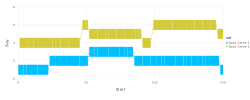

In [172]:
plot_solution(best_LS, total_makespan(best_LS, CTS), CTS)

In [ ]:
makespan

In [ ]:
wrong_its

In [171]:
wrong_its=0
for iter = 1:5000
    gamma = rand()
    if gamma <= 0.25 || gamma >= 0.9
        gamma = 0.5
    end
    new_LS=remove_tasks(gamma, best_LS, CTS)
    TIME, QC = get_current_state(new_LS, CTS)
    while new_LS.tasks_left > 0 && TIME.period < TIME.horizon_plan
        cranes_status = "idle"
        while cranes_status != "All cranes are busy" && cranes_status != "Next time period" && cranes_status != "LS is completed"
            cranes_status = GRASP("minimal", tasks_by_w, bj, new_LS, TIME, QC, CTS)
        end
        next_time_period(TIME, QC);
    end

    if check_solution(new_LS, QC, CTS) == true
        if total_makespan(new_LS) < makespan
            makespan = total_makespan(new_LS, CTS)
            best_LS = new_LS
        end
    else
        wrong_its += 1
    end
end

makespan

150

In [ ]:
err_LS = remove_tasks(43/60, best_LS, CTS)

In [ ]:
plot_solution(err_LS, total_makespan(err_LS), CTS)

In [ ]:
last_qc_moves(err_LS,CTS)

In [ ]:
TIME, QC = get_current_state(err_LS, CTS)

In [ ]:
next_time_period(TIME, QC)
println(TIME)
println(QC)

In [ ]:
    while new_LS.tasks_left > 0 && TIME.period < TIME.horizon_plan
        cranes_status = "idle"
        while cranes_status != "All cranes are busy" && cranes_status != "Next time period" && cranes_status != "LS is completed"
            cranes_status = GRASP("minimal", tasks_by_w, bj, new_LS, TIME, QC, CTS)
        end
        next_time_period(TIME, QC);
    end

In [ ]:
plot_solution(wrong_LS, CTS)

In [ ]:
#include("../src/heuristics/GRASP.jl")
include("../src/heuristics/GRASP_with_ind.jl")
include("../src/basics/validations.jl")
include("../src/basics/basic_functions.jl")
include("../src/heuristics/local_search.jl");

In [ ]:
new_LS=remove_tasks(0.20, best_LS, CTS)

In [ ]:
min_q, QC_MOVES = last_qc_moves(new_LS, CTS)

In [ ]:
TIME.period = min_q.start_time + 2*min_q.time

In [ ]:
plot_solution(new_LS, total_makespan(new_LS), CTS)

In [ ]:
QC

In [ ]:
while new_LS.tasks_left > 0 && TIME.period < TIME.horizon_plan
    cranes_status = "idle"
    while cranes_status != "All cranes are busy" && cranes_status != "Next time period" && cranes_status != "LS is completed"
        cranes_status = GRASP("minimal", tasks_by_w, bj, new_LS, TIME, QC, CTS)
    end
    next_time_period(TIME, QC);
end

In [ ]:
new_LS

In [ ]:
check_solution(new_LS, QC, CTS)